### Apriori algorithm 2021

In [1]:
# Import thư viện
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Đọc dữ liệu
file_path = 'D:/TTTN/CODE/Data Fixed/data_1.csv'
df = pd.read_csv(file_path)

In [3]:
# Đổi định dạng cột "Date Created"
df['Date Created'] = pd.to_datetime(df['Date Created'])

# Chọn các cột cần thiết
df_basket = df[['Date Created', 'Transaction Code', 'Short Item Code']]

In [4]:
# Lọc dữ liệu theo năm
df_21 = df_basket[((df_basket['Date Created'].dt.year == 2021) & (df_basket['Date Created'].dt.month.isin([10, 11])))]


In [5]:
# Tạo danh sách chứa các giao dịch duy nhất
transaction_list = []
for i in df_21['Transaction Code'].unique():
    l = list(set(df_21[df_21['Transaction Code']==i]['Short Item Code']))
    if len(l) > 0:
        transaction_list.append(l)
        
print(len(transaction_list))

913


In [6]:
transaction_list

[['V0394-P1S100', 'V0321-P1F000', 'V0320-P1F000', 'V0145-P1F000'],
 ['V8102-P1S000', 'V0130-P1S100', 'V0116-P1F000', 'V9407-P1S000'],
 ['J0427-P1F000', 'J0317-P1F000', 'J0319-P1F000', 'J7338-P1OS00'],
 ['V0101-P1F000', 'V0183-P2S000'],
 ['V9407-P1S000',
  'V0346-P1F000',
  'V0129-P1S100',
  'V0320-P1F000',
  'V0313-P1F000',
  'V0155-P1S000'],
 ['V9134-P1S100',
  'V0307-P1F000',
  'V9133-P1S100',
  'V0103-P1F000',
  'V0305-P1F000'],
 ['J0427-P1F000', 'J0428-P1F000', 'J0418-P1F000', 'J0321-P1F000'],
 ['V0412-P1S100',
  'V0302-P1F000',
  'V0107-P1F000',
  'V0127-P1F000',
  'V0131-P1S100',
  'V0130-P1S100',
  'V0309-P1F000',
  'V0155-P1S000',
  'V9131-P1S000',
  'V0306-P1F000',
  'V0395-P1S100'],
 ['V0149-P1S000',
  'V9407-P1S000',
  'V0153-P1S000',
  'V0314-P1S100',
  'V0343-P1F000',
  'V0154-P1F000'],
 ['J7338-P1OS00',
  'J0208-P1S000',
  'J0307-P1F000',
  'J0304-P1F000',
  'J0209-P1F000',
  'J1151-P1S100',
  'J0311-P1F000',
  'J0319-P1F000',
  'J1103-P1S100'],
 ['V9407-P1S000', 'V0320-P

In [7]:
# Mã hóa dữ liệu
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
te_basket = pd.DataFrame(te_ary, columns=te.columns_)

te_basket.head()

,B5220-P1OS00,B5221-P1OS00,B7104-P1OS00,B8102-P1OS00,B8106-P1OS00,B8110-P1OS00,B8111-P1OS00,B8112-P1OS00,B8322-P1OS00,B8324-P1OS00,...,V8102-P1S000,V8339-P1OS00,V9131-P1S000,V9133-P1S100,V9134-P1S100,V9386-P1OS00,V9407-P1S000,V9408-P1OS00,V9408-P1S100,VHQ01-P1S100
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [8]:
# Giá trị support và confidence
support_levels = [0.03, 0.02, 0.01, 0.005]
confidence_levels = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# Tạo danh sách rỗng
rules_sup3 = []
rules_sup2 = []
rules_sup1 = []
rules_sup05 = []

# Thuật toán Apriori với giá trị support 3%
for confidence_level in confidence_levels:
    frequent_itemsets = apriori(te_basket, min_support=support_levels[0], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
    rules_sup3.append(len(rules))

# Thuật toán Apriori với giá trị support 2%
for confidence_level in confidence_levels:
    frequent_itemsets = apriori(te_basket, min_support=support_levels[1], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
    rules_sup2.append(len(rules))

# Thuật toán Apriori với giá trị support 1%
for confidence_level in confidence_levels:
    frequent_itemsets = apriori(te_basket, min_support=support_levels[2], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
    rules_sup1.append(len(rules))

# Thuật toán Apriori với giá trị support 0.5%
for confidence_level in confidence_levels:
    frequent_itemsets = apriori(te_basket, min_support=support_levels[3], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
    rules_sup05.append(len(rules))

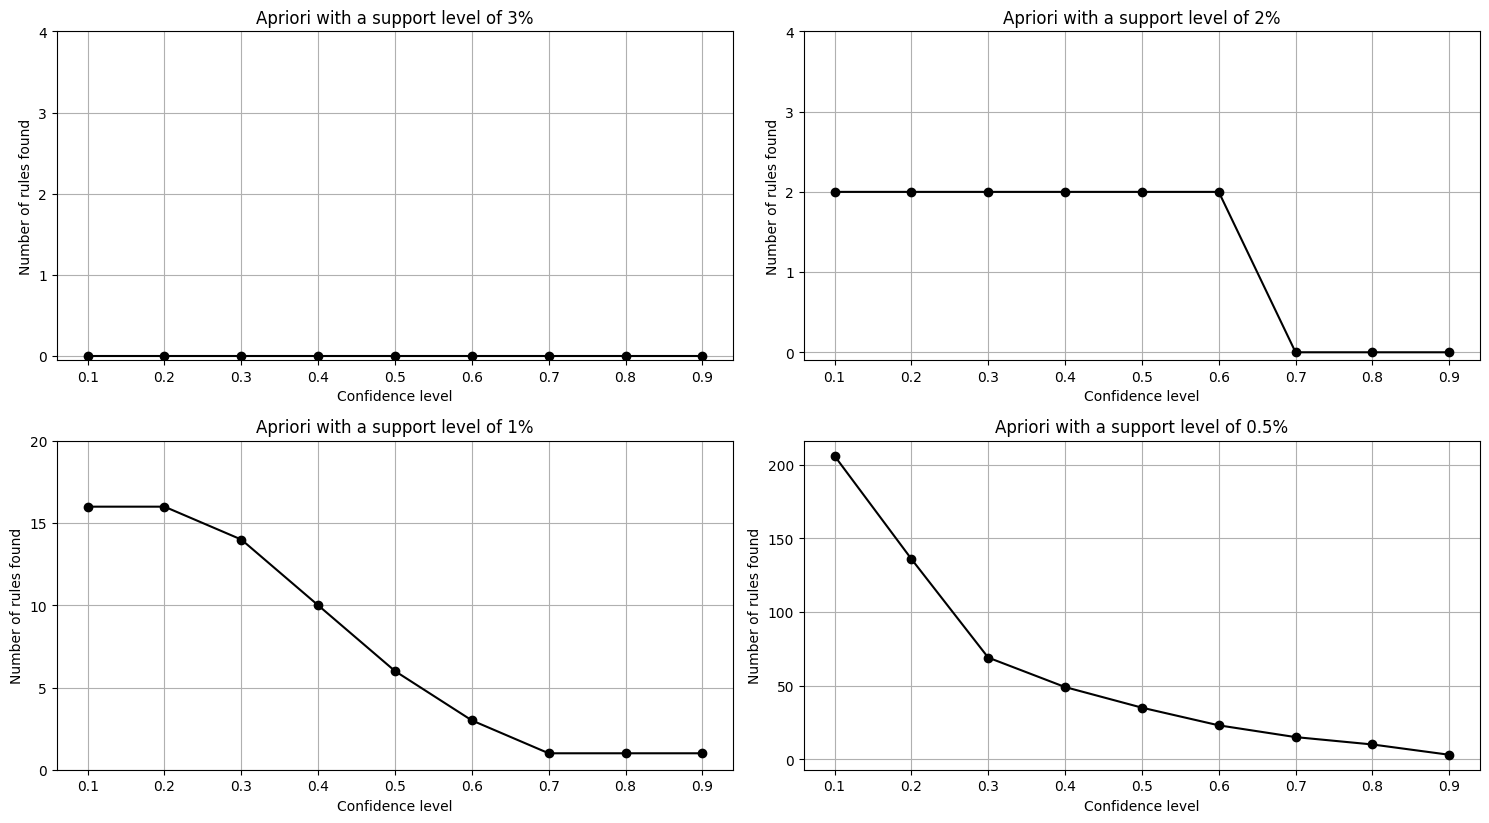

In [9]:
plt.figure(figsize=(15, 12))

# Số quy tắc được tìm thấy với support 3%
plt.subplot(3, 2, 1)
plt.plot(confidence_levels, rules_sup3, marker='o', linestyle='-', color='black')
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori with a support level of 3%')
plt.yticks(np.arange(0, 5, 1))
plt.grid(True)
plt.gca().set_axisbelow(True)

# Số quy tắc được tìm thấy với support 2%
plt.subplot(3, 2, 2)
plt.plot(confidence_levels, rules_sup2, marker='o', linestyle='-', color='black')
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori with a support level of 2%')
plt.yticks(np.arange(0, 5, 1))
plt.grid(True)
plt.gca().set_axisbelow(True)

# Số quy tắc được tìm thấy với support 1%
plt.subplot(3, 2, 3)
plt.plot(confidence_levels, rules_sup1, marker='o', linestyle='-', color='black')
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori with a support level of 1%')
plt.yticks(np.arange(0, 25, 5))
plt.grid(True)
plt.gca().set_axisbelow(True)

# Số quy tắc được tìm thấy với support 0.5%
plt.subplot(3, 2, 4)
plt.plot(confidence_levels, rules_sup05, marker='o', linestyle='-', color='black')
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori with a support level of 0.5%')
plt.yticks(np.arange(0, 250, 50))
plt.grid(True)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

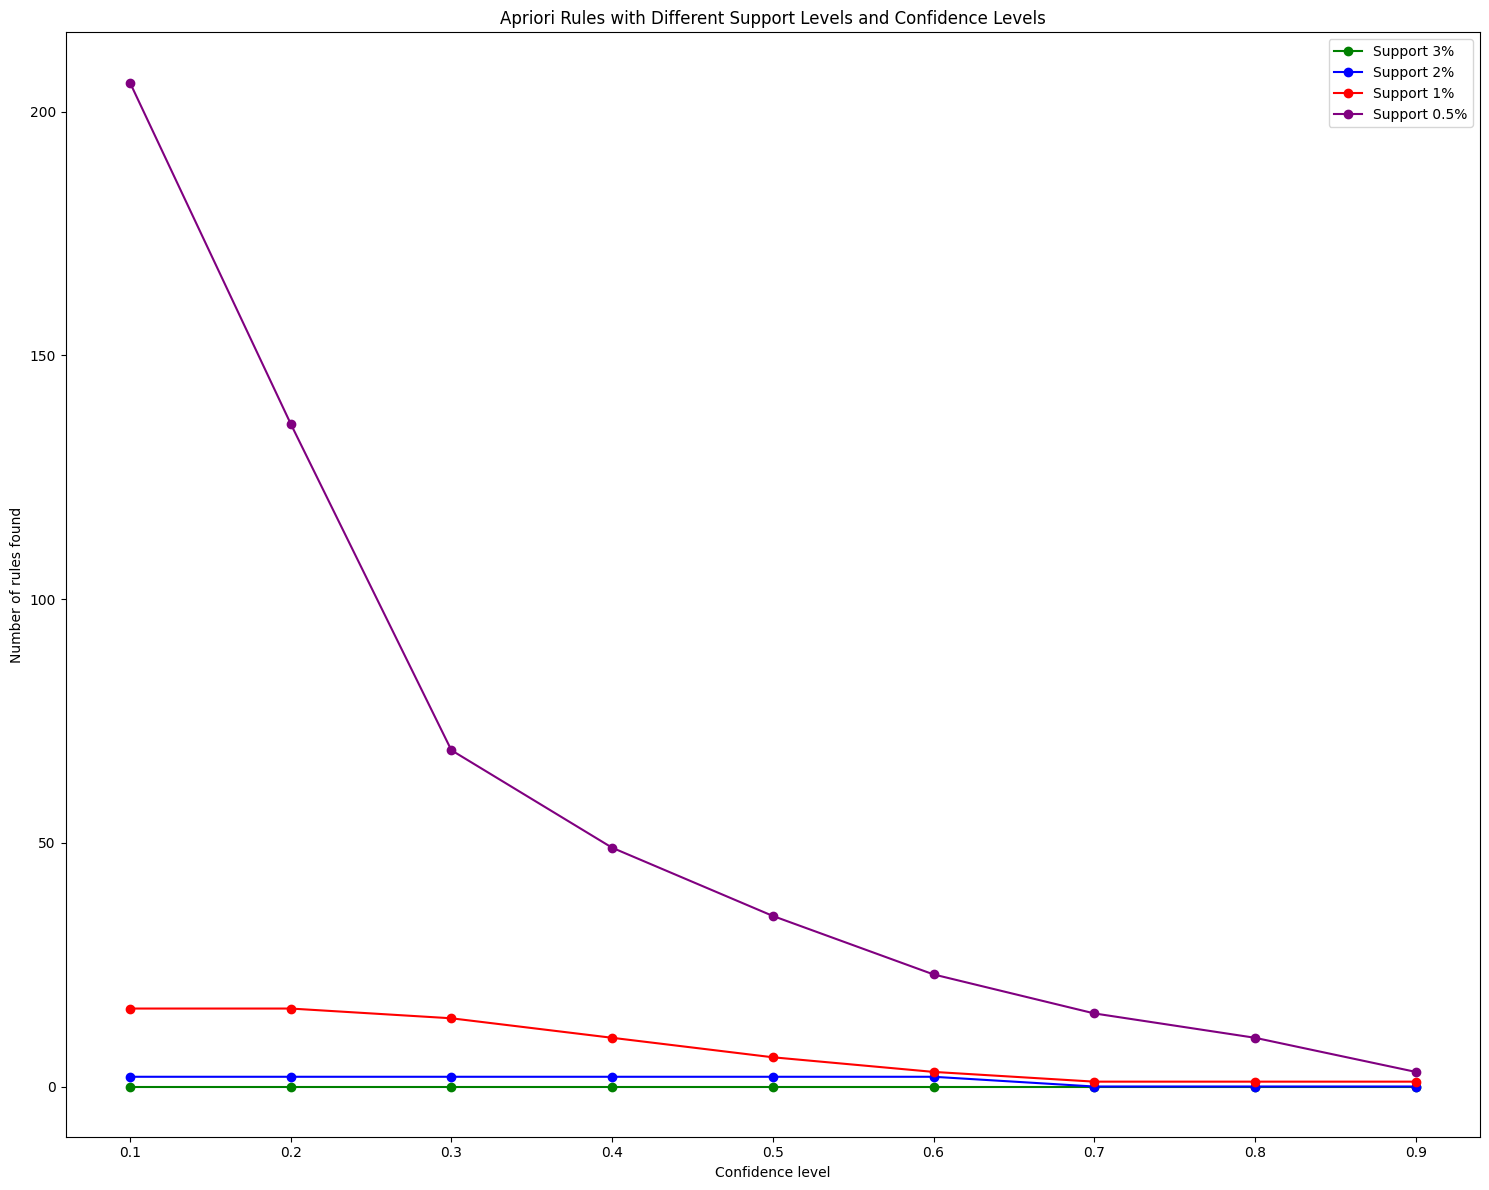

In [10]:
# Tùy chọn kích thước
plt.figure(figsize=(15, 12))

# Hiển thị tất cả trên cùng 1 biểu đồ
plt.plot(confidence_levels, rules_sup3, marker='o', linestyle='-', color='g', label='Support 3%')
plt.plot(confidence_levels, rules_sup2, marker='o', linestyle='-', color='b', label='Support 2%')
plt.plot(confidence_levels, rules_sup1, marker='o', linestyle='-', color='r', label='Support 1%')
plt.plot(confidence_levels, rules_sup05, marker='o', linestyle='-', color='purple', label='Support 0.5%')

# Đặt nhãn và tiêu đề
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori Rules with Different Support Levels and Confidence Levels')
plt.legend()

# Điều chỉnh bố cục hiển thị
plt.tight_layout()
plt.show()

In [11]:
# Xây dựng mô hình
frequent_itemsets = apriori(te_basket, min_support=support_levels[2], use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_levels[4])
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [12]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(J0417-P1F000),(J0419-P1F000),0.037240,0.033954,0.023001,0.617647,18.190702,0.021737,2.526582,0.981581
1,(J0419-P1F000),(J0417-P1F000),0.033954,0.037240,0.023001,0.677419,18.190702,0.021737,2.984556,0.978242
2,(J0420-P1F000),(J0418-P1F000),0.029573,0.037240,0.016429,0.555556,14.918301,0.015328,2.166210,0.961400
3,(J9133-P1OS00),(J9133-P1F000),0.020811,0.012048,0.012048,0.578947,48.052632,0.011797,2.346386,1.000000
4,(J9133-P1F000),(J9133-P1OS00),0.012048,0.020811,0.012048,1.000000,48.052632,0.011797,inf,0.991131
5,(V0372-P1S100),(V0371-P1S100),0.025192,0.031763,0.013143,0.521739,16.425787,0.012343,2.024495,0.963390


In [13]:
frequent_itemsets

,support,itemsets,length
0,0.016429,(J0206-P1S000),1
1,0.030668,(J0206-P1S001),1
2,0.017525,(J0207-P1S000),1
3,0.035049,(J0207-P1S001),1
4,0.010953,(J0208-P1S000),1
...,...,...,...
123,0.016429,"(J0418-P1F000, J0420-P1F000)",2
124,0.012048,"(J9133-P1OS00, J9133-P1F000)",2
125,0.010953,"(V0129-P1S100, V0343-P1F000)",2
126,0.010953,"(V0154-P1F000, V0153-P1F000)",2


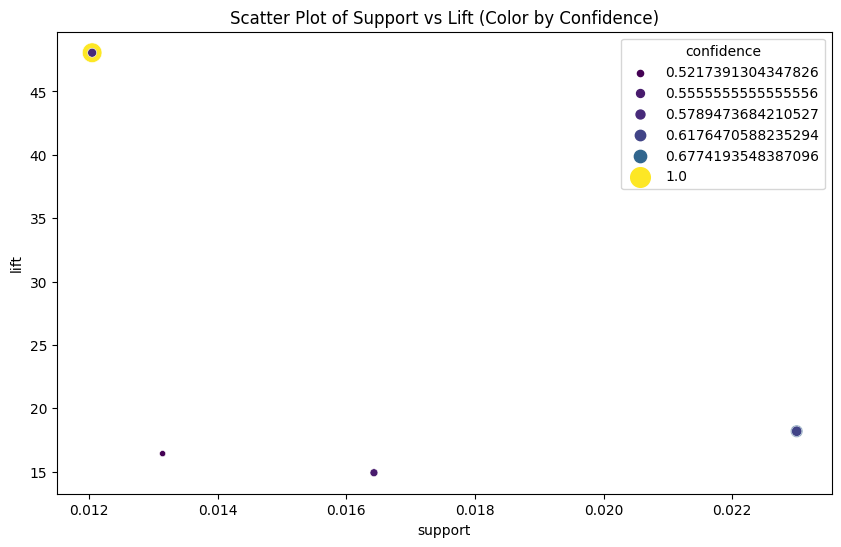

In [14]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='lift', data=rules, hue='confidence', palette='viridis', size='confidence', sizes=(20, 200))
plt.title('Scatter Plot of Support vs Lift (Color by Confidence)')
plt.xlabel('support')
plt.ylabel('lift')
plt.show()